***Problem 1***

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

### A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visulization
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
sns.set_palette("deep")

#command to tell python to withdata visulation
%matplotlib inline

# To Avoiding warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Make my Jupyter Notebook wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
austo=pd.read_csv('austo_automobile+(2)+(1).csv')

In [3]:
austo.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
austo.shape

(1581, 14)

In [5]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
# Check for duplicate column values
duplicates = austo.duplicated(keep=False)

# Check if any columns have duplicate values
if duplicates.any():
    # Get the columns with duplicate values
    duplicate_columns = df.columns[duplicates].tolist()
    print("Duplicate columns:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


**In a given data set, there are 1581 rows and 14 columns. The gender and partner_salary columns have null values, but there are no duplicate values in the whole dataframe.**

Looking at the kind of data that has been made available to us for analysis would be our first responsibility in this situation. Now let's examine the features' datatype.

##### Categorical Variables:

Binary:
1. Gender    
2. Marital_status 
3. Personal_loan         
4. House_loan            
5. Partner_working 

Multi-level:
1. Profession      
2. Education     
3. Make

##### Continious Variables:
1. Salary 
2. Partner_salary 
3. Total_salary 
4. Price 

##### Discrete Variables:
1. Age 
2. No_of_Dependents                      

### B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

* Yes, there are discrepancies in the `Gender` and `Partner_salary` columns. Both columns have null values, so I imputed the values.

In [8]:
austo['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

* There is spelling incorrect for `Female`, so correct it first, then replace null values with `Male` because the accuracy of Male is maximum.

In [9]:
# Replace the incorrect spelling with the correct spelling
austo['Gender'] = austo['Gender'].replace('Femle', 'Female')

austo['Gender'] = austo['Gender'].replace('Femal', 'Female')

In [10]:
austo['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [11]:
#Replace Null with the Male
austo['Gender'] = austo['Gender'].fillna('Male')
austo['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [12]:
austo['Partner_salary'].value_counts()

0.0        623
40500.0     29
40200.0     27
40100.0     25
40000.0     25
          ... 
45800.0      1
27300.0      1
22900.0      1
23100.0      1
35000.0      1
Name: Partner_salary, Length: 149, dtype: int64

* As data shows, `Total_Salary=Salary+Partner_Salary`, so `Partner_Salary=Total_Salary-salary` based on `Partner_working` status is `yes`.

In [13]:
# Conditionally impute Partner_salary based on Partner_working
austo.loc[austo['Partner_working'] == 'No', 'Partner_salary'] = 0
austo.loc[austo['Partner_working'] == 'Yes', 'Partner_salary'] = austo['Total_salary'] - austo['Salary']
austo['Partner_salary'].value_counts()

0.0        713
40500.0     29
40200.0     27
40100.0     26
40000.0     25
          ... 
23100.0      1
23700.0      1
45800.0      1
22900.0      1
35000.0      1
Name: Partner_salary, Length: 150, dtype: int64

In [14]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [15]:
austo.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

#### Now there are no discrepancies in the dataset.

### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

In [16]:
austo.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


* Age groups between 22-54 are working customers. Age group between 22-25 (Aporx): partners are non-working.
* Salary increases positively between 30000-99300 for age groups between 22-54.
* Car prices range from 18000–70000.

#### Univariate Analysis with Numerical Variable

In [17]:
# Age of customer buys cars the most
austo_CarAge = austo['Age'].mode()

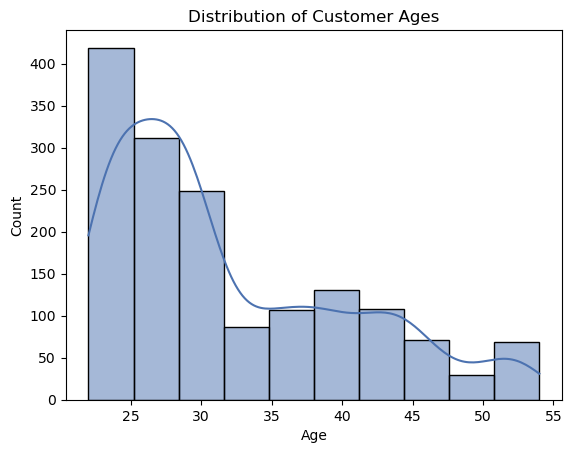

In [18]:
# Univariate Analysis using Histogram, Age Attribute
#plt.figure(figsize=(10, 6))
sns.histplot(data=austo, x='Age', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()

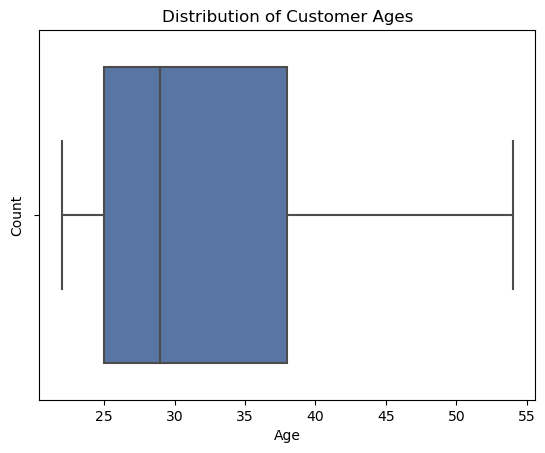

In [19]:
# Univariate Analysis using Boxplot findout outliers

sns.boxplot(data=austo, x='Age');
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()

* According to the above 2 plots, `Age` is positively skewed (skewed right), and there are no outliers.

In [20]:
age_skewness = pd.Series(austo['Age']).skew()
age_skewness

0.8930870865867485

<Axes: xlabel='Salary', ylabel='Count'>

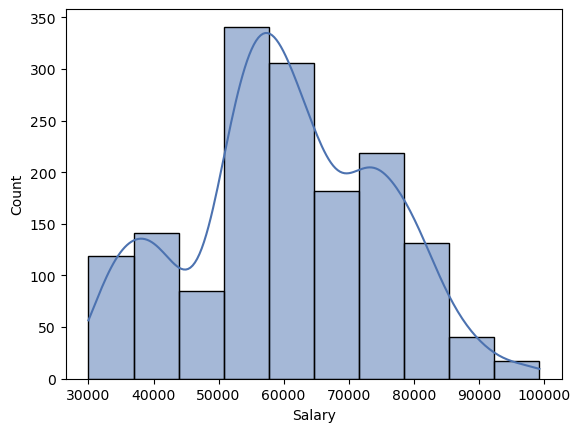

In [21]:
# Univariate Analysis using Histogram, Salary Attribute
sns.histplot(data=austo,x='Salary',kde=True,bins=10)

<Axes: xlabel='Salary'>

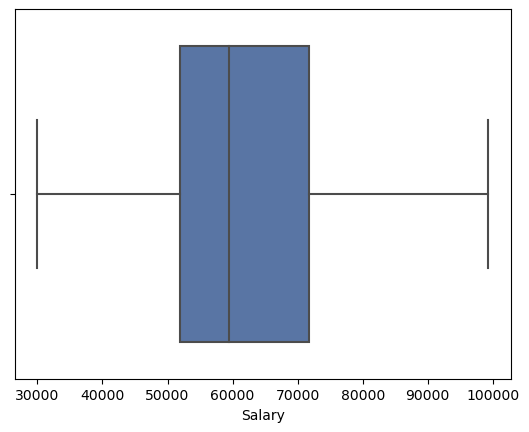

In [22]:
# Univariate Analysis Boxplot findout outliers, Salary Attribute
sns.boxplot(data=austo,x='Salary')

* According to the above 2 plots, `Salary` has a symmetrical distribution, and there are no outliers.

In [23]:
Salary_skewness = pd.Series(austo['Salary']).skew()
Salary_skewness

-0.011570808595835032

* Salary distribution is symmetrical because skewness is close to 0.

<Axes: xlabel='Partner_salary', ylabel='Count'>

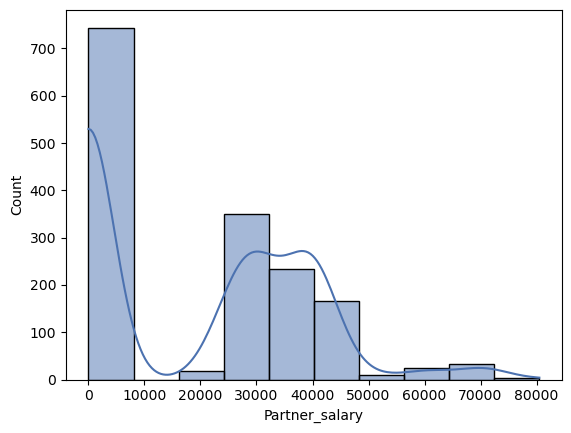

In [24]:
# Univariate Analysis using Histogram, Partner_salary Attribute
sns.histplot(data=austo,x='Partner_salary',kde=True,bins=10)

<Axes: xlabel='Partner_salary'>

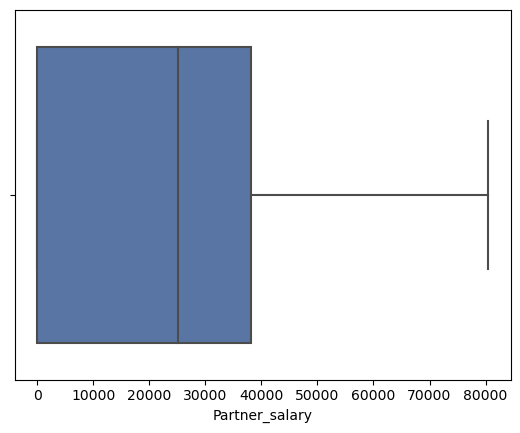

In [25]:
# Univariate Analysis Boxplot findout outliers, Partner_salary Attribute
sns.boxplot(data=austo,x='Partner_salary')

* According to the above 2 plots, `Partner_salary` is negatively skewed (skewed left), and there are no outliers.

In [26]:
Partner_salary_skewness = pd.Series(austo['Partner_salary']).skew()
Partner_salary_skewness

0.4410686067568632

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


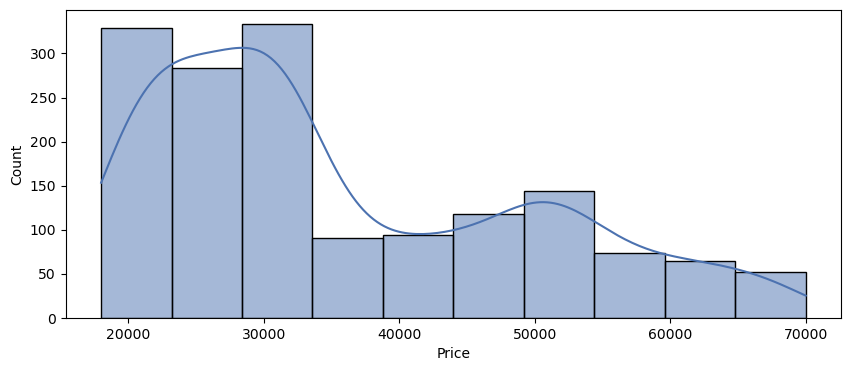

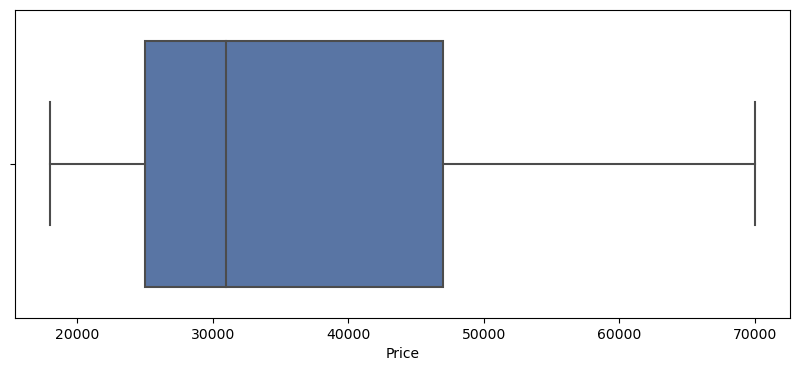

In [27]:
# Univariate Analysis using Histogram and Boxplot Price Attribute
plt.figure(figsize=(10, 4))
print(sns.histplot(data=austo,x='Price',kde=True,bins=10))
plt.figure(figsize=(10, 4))
print(sns.boxplot(data=austo,x='Price'))

* According to the above 2 plots, `Price` is positively skewed (skewed right), and there are no outliers.

In [28]:
Price_salary_skewness = pd.Series(austo['Partner_salary']).skew()
Price_salary_skewness

0.4410686067568632

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


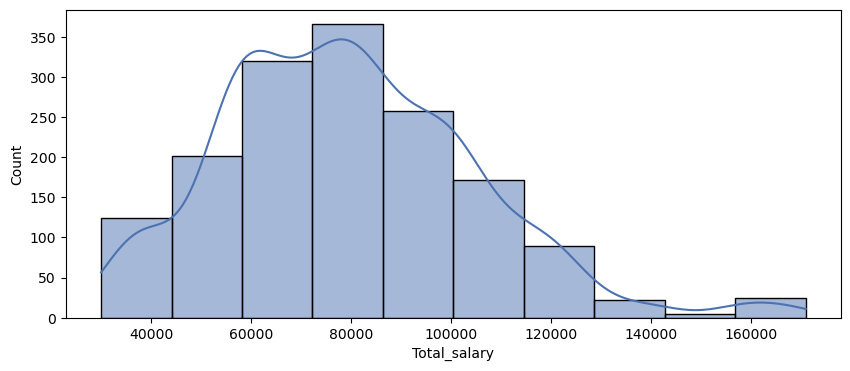

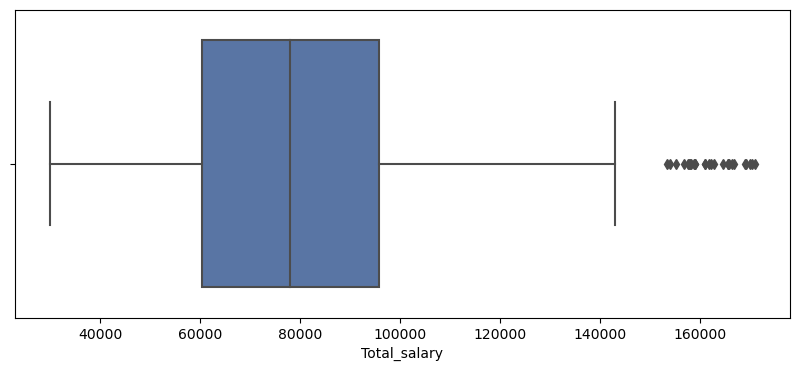

In [29]:
# Univariate Analysis using Histogram and Boxplot, Total_salary Attribute
plt.figure(figsize=(10, 4))
print(sns.histplot(data=austo,x='Total_salary',kde=True,bins=10))
plt.figure(figsize=(10, 4))
print(sns.boxplot(data=austo,x='Total_salary'))

* `Total_salary` has outliers.

In [30]:
Total_salary_skewness = pd.Series(austo['Total_salary']).skew()
Total_salary_skewness

0.6097056414760922

In [31]:
# Outlier Treatment

# Calculate the IQR
Q1 = austo['Total_salary'].quantile(0.25)
Q3 = austo['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
Total_salary_outliers = len(austo[(austo['Total_salary'] < lower_bound) | (austo['Total_salary'] > upper_bound)])
print('The number of outliers in total salary is:',Total_salary_outliers)

The number of outliers in total salary is: 27


In [32]:
austo_out_treat = austo.copy()  # Create a copy of the original dataset

austo_out_treat = austo_out_treat[(austo_out_treat['Total_salary'] >= lower_bound) & (austo_out_treat['Total_salary'] <= upper_bound)]

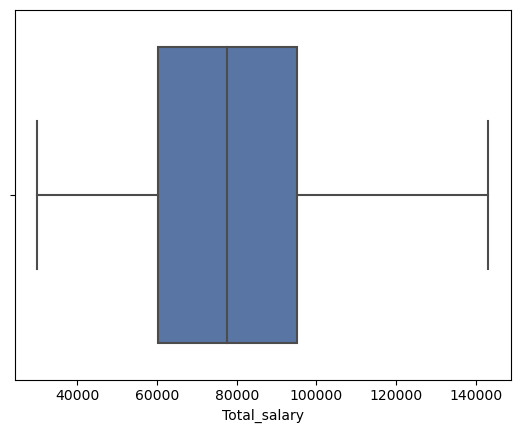

In [33]:
sns.boxplot(data=austo_out_treat,x='Total_salary');

* Now `Total_salary` has no outliers.

#### Univariate Analysis with Categorical Variables

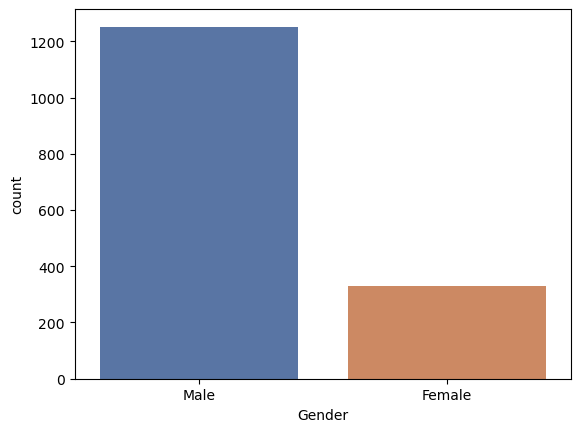

In [34]:
# Univariate Analysis using Histogram for Gender Attribute
sns.countplot(data=austo,x='Gender');

* Maximum car brought by the `Male` customers

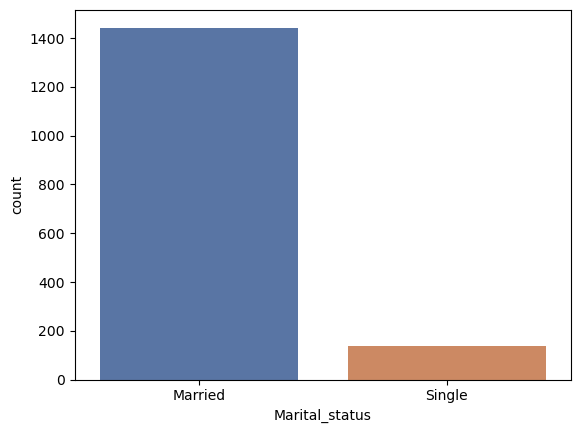

In [35]:
# Univariate Analysis using Histogram for Marital_status Attribute
sns.countplot(data=austo,x='Marital_status');

* Married customers buy more car compare to single customers

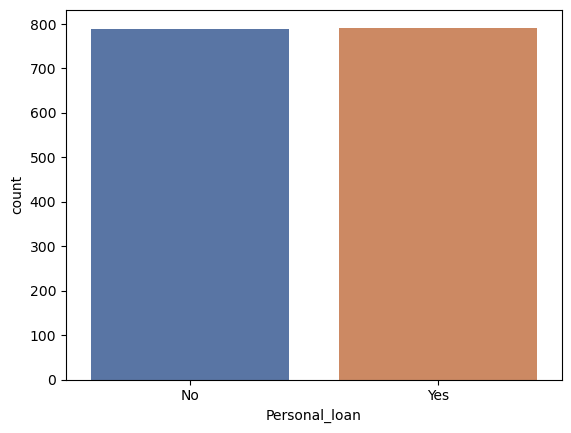

In [36]:
# Univariate Analysis using Histogram for Personal_loan Attribute
sns.countplot(data=austo,x='Personal_loan');

* Who have personal loan customers are similar to those who do not have personal loan customers.

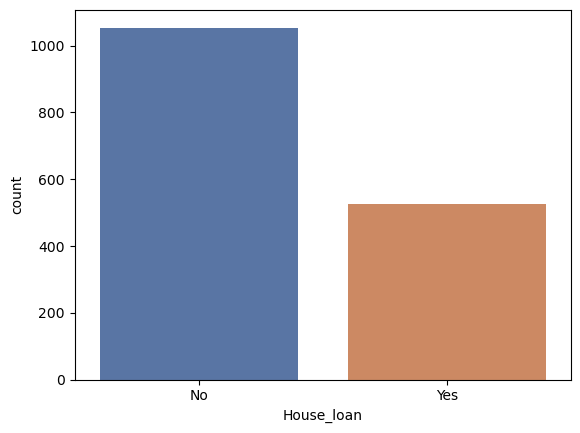

In [37]:
# Univariate Analysis using Histogram for House_loan Attribute
sns.countplot(data=austo,x='House_loan');

* Apporax 500 customers have a house loan, or almost double the number of customers who do not have a house loan.

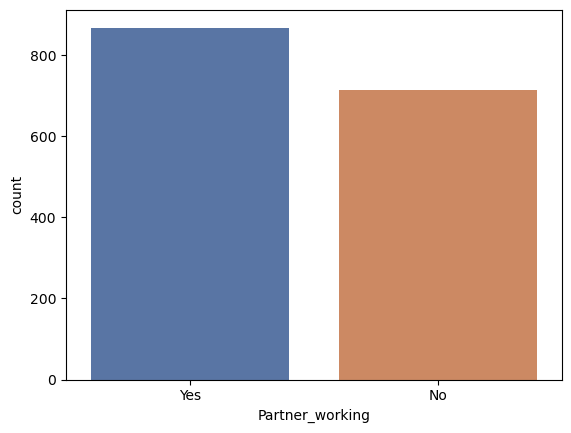

In [38]:
# Univariate Analysis using Histogram for Partner_working Attribute
sns.countplot(data=austo,x='Partner_working');

* `Partner_working` customers count are slightly higher then the `Non Partner_working` customers

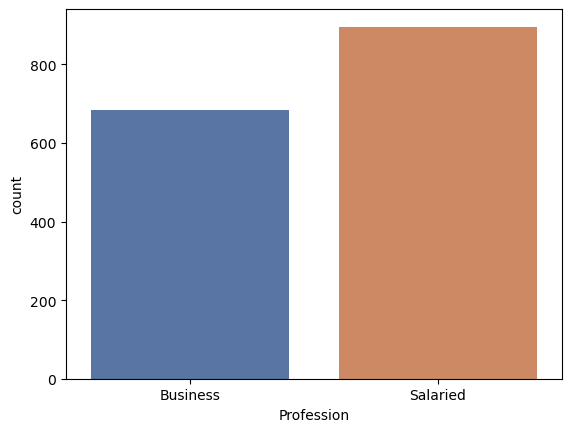

In [39]:
# Univariate Analysis using Histogram for Profession Attribute
sns.countplot(data=austo,x='Profession');

* `Salaried` customers count are slightly higher then the `Buiness` customers

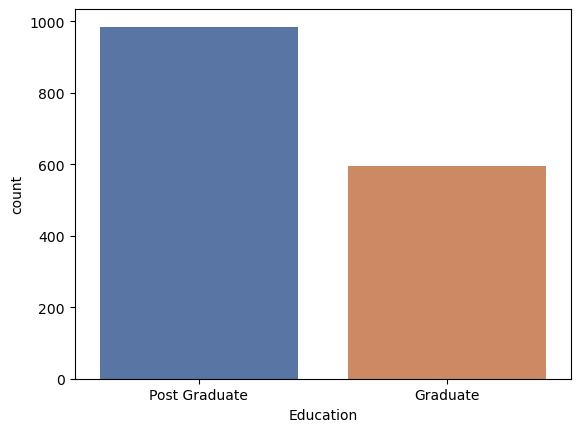

In [40]:
# Univariate Analysis using Histogram for Education Attribute
sns.countplot(data=austo,x='Education');

* The majority of customers are `Post Graduates`.

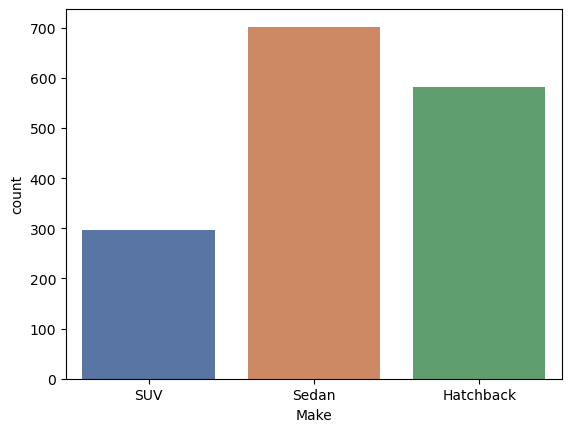

In [41]:
# Univariate Analysis using Histogram for Make Attribute
sns.countplot(data=austo,x='Make');

* A `Sedan` is the most preferred purchase car rather than a hatchback or SUV.

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

#### Perform Bivariate Analysis Categorical Variables

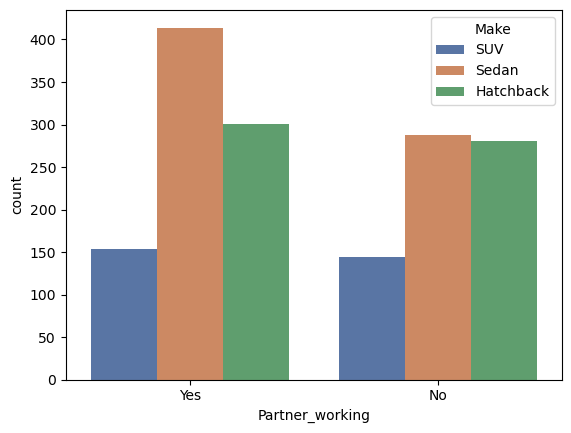

In [42]:
#Bivariate Analysis between Partner_working and Make
sns.countplot(data=austo,x='Partner_working',hue='Make');

* Sedan purchases more when his partner is working.

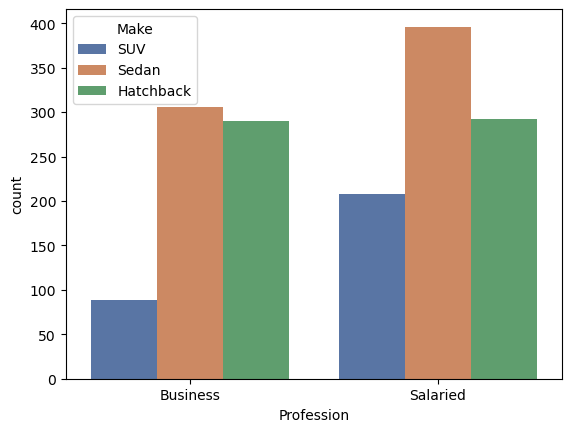

In [43]:
#Bivariate Analysis between Profession and Make
sns.countplot(data=austo,x='Profession',hue='Make');

* The majority of sedan purchases are made by salary-based customers.

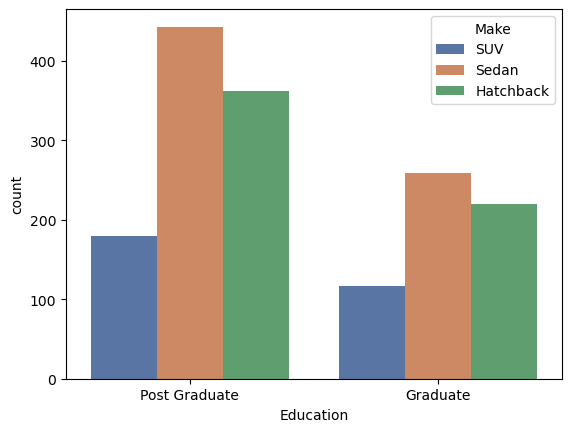

In [44]:
#Bivariate Analysis between Education and Make
sns.countplot(data=austo,x='Education',hue='Make');

* The majority of sedan purchases are made by Post Gradute customers.

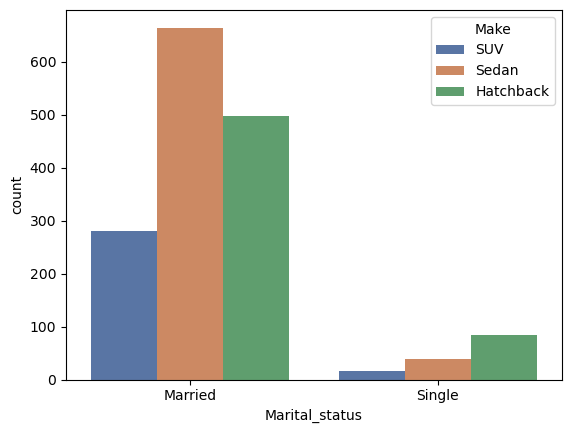

In [45]:
#Bivariate Analysis between Marital_status and Make
sns.countplot(data=austo,x='Marital_status',hue='Make');

* Married customers purchase more cars, especially sedans, than single customers.

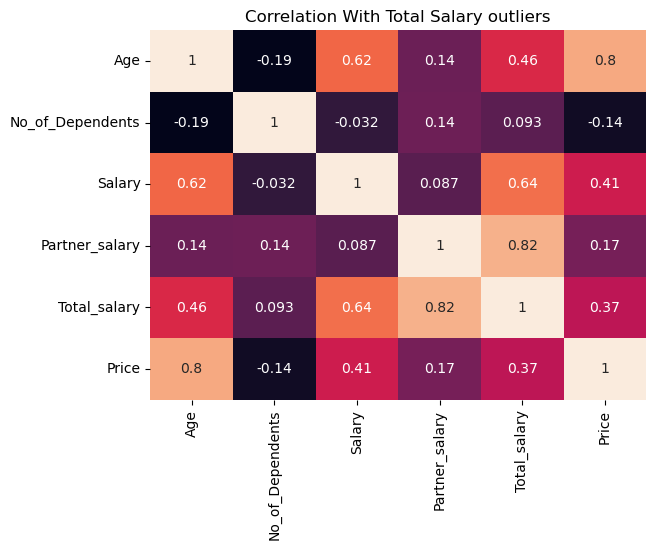

In [46]:
# Correlation Visulazion of Numerical variables with outliers
sns.heatmap(data=austo[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(),annot=True, cbar=False);
plt.title('Correlation With Total Salary outliers');

In [47]:
austo['Total_salary'].value_counts()

57100     8
95900     7
78600     7
63200     7
73400     7
         ..
118800    1
49900     1
74500     1
104200    1
31600     1
Name: Total_salary, Length: 754, dtype: int64

In [48]:
austo_out_treat['Total_salary'].value_counts()

57100     8
73400     7
99400     7
63200     7
95900     7
         ..
63400     1
97600     1
100800    1
106100    1
31600     1
Name: Total_salary, Length: 728, dtype: int64

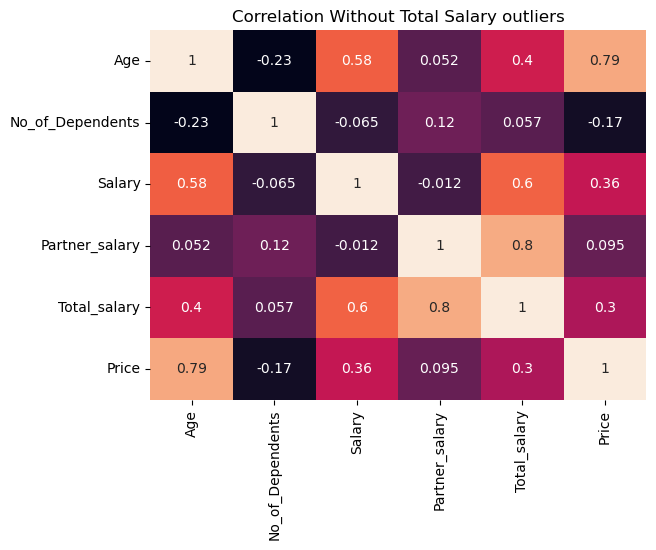

In [49]:
# Correlation Visulazion of Numerical variables without outliers
sns.heatmap(data=austo_out_treat[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(),annot=True, cbar=False);
plt.title('Correlation Without Total Salary outliers');

##### Plot a Pairplot to know the distributions and correlations of all variables of the data frame ‘austo’

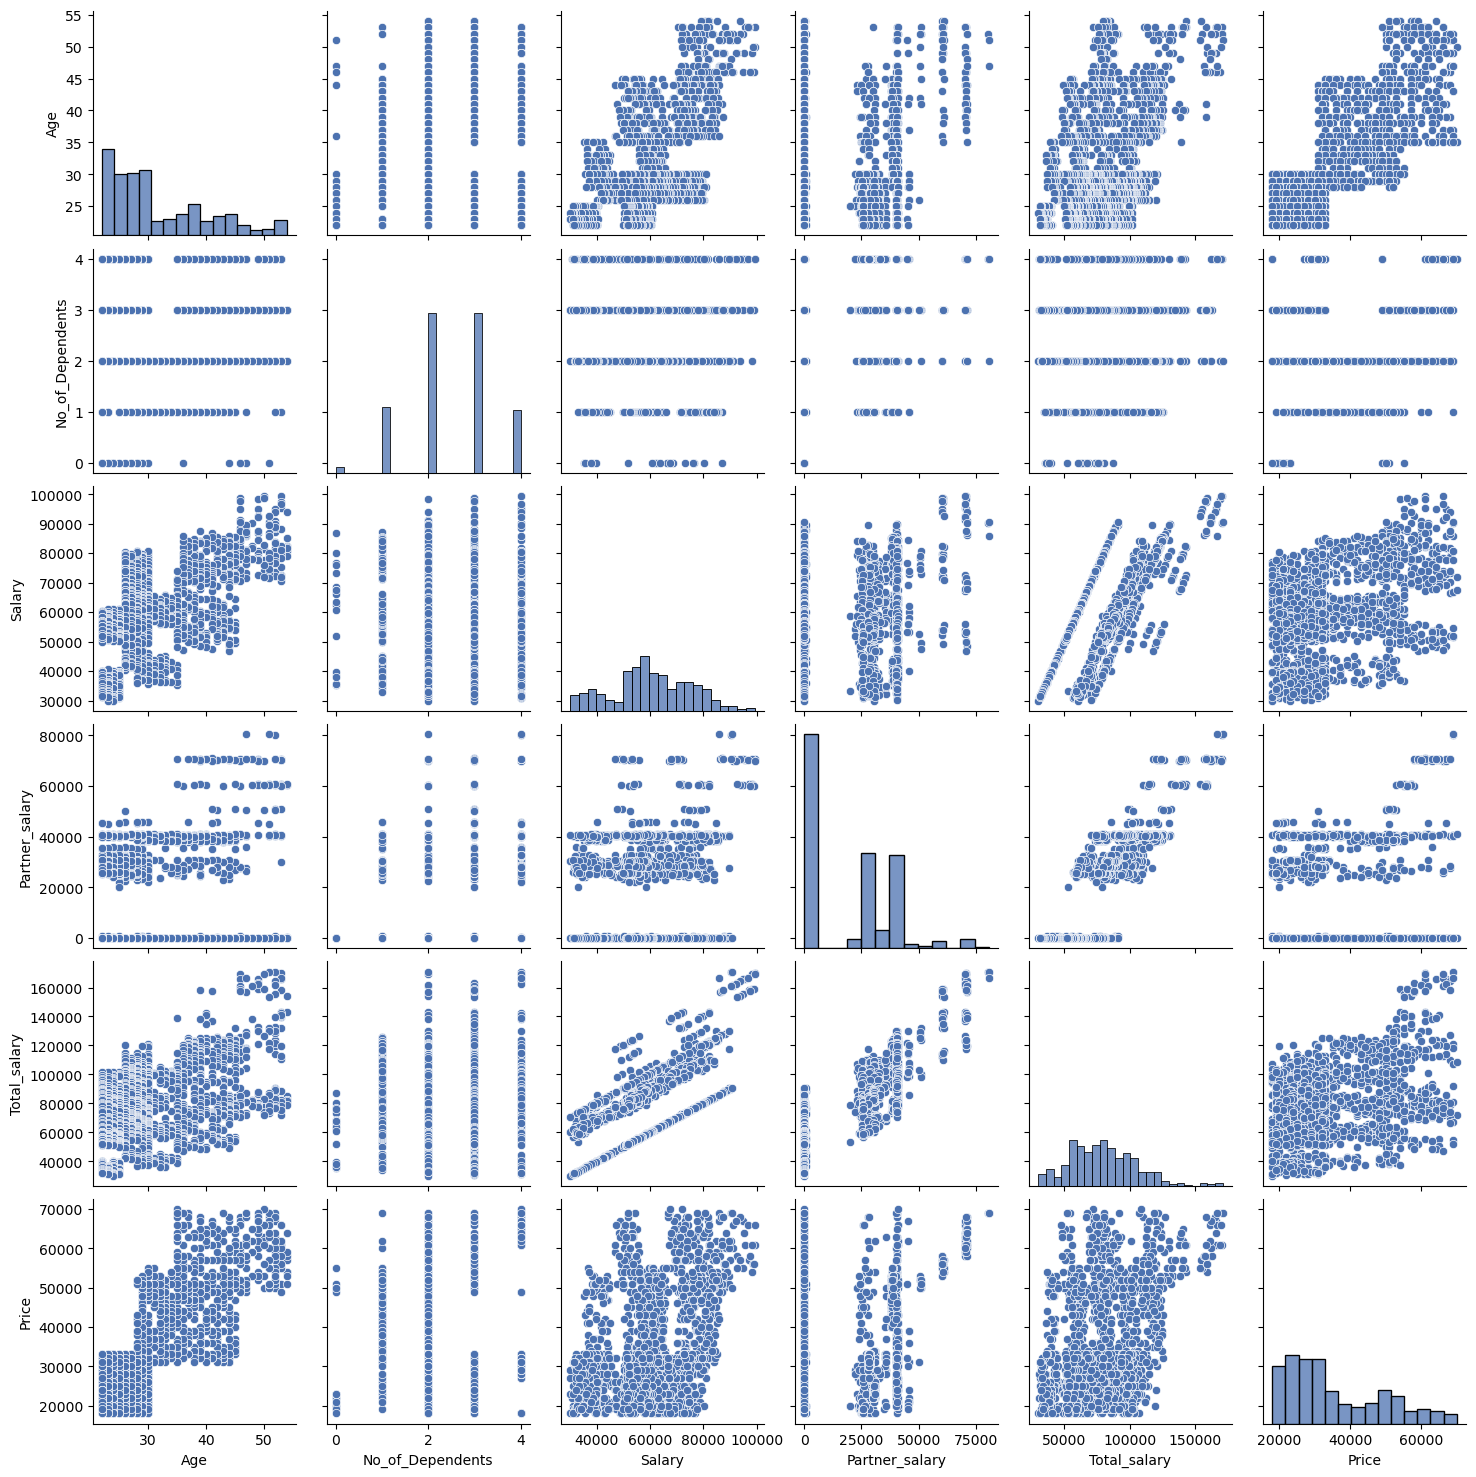

In [50]:
#Correlation With Total Salary outliers
sns.pairplot(austo)
plt.show()

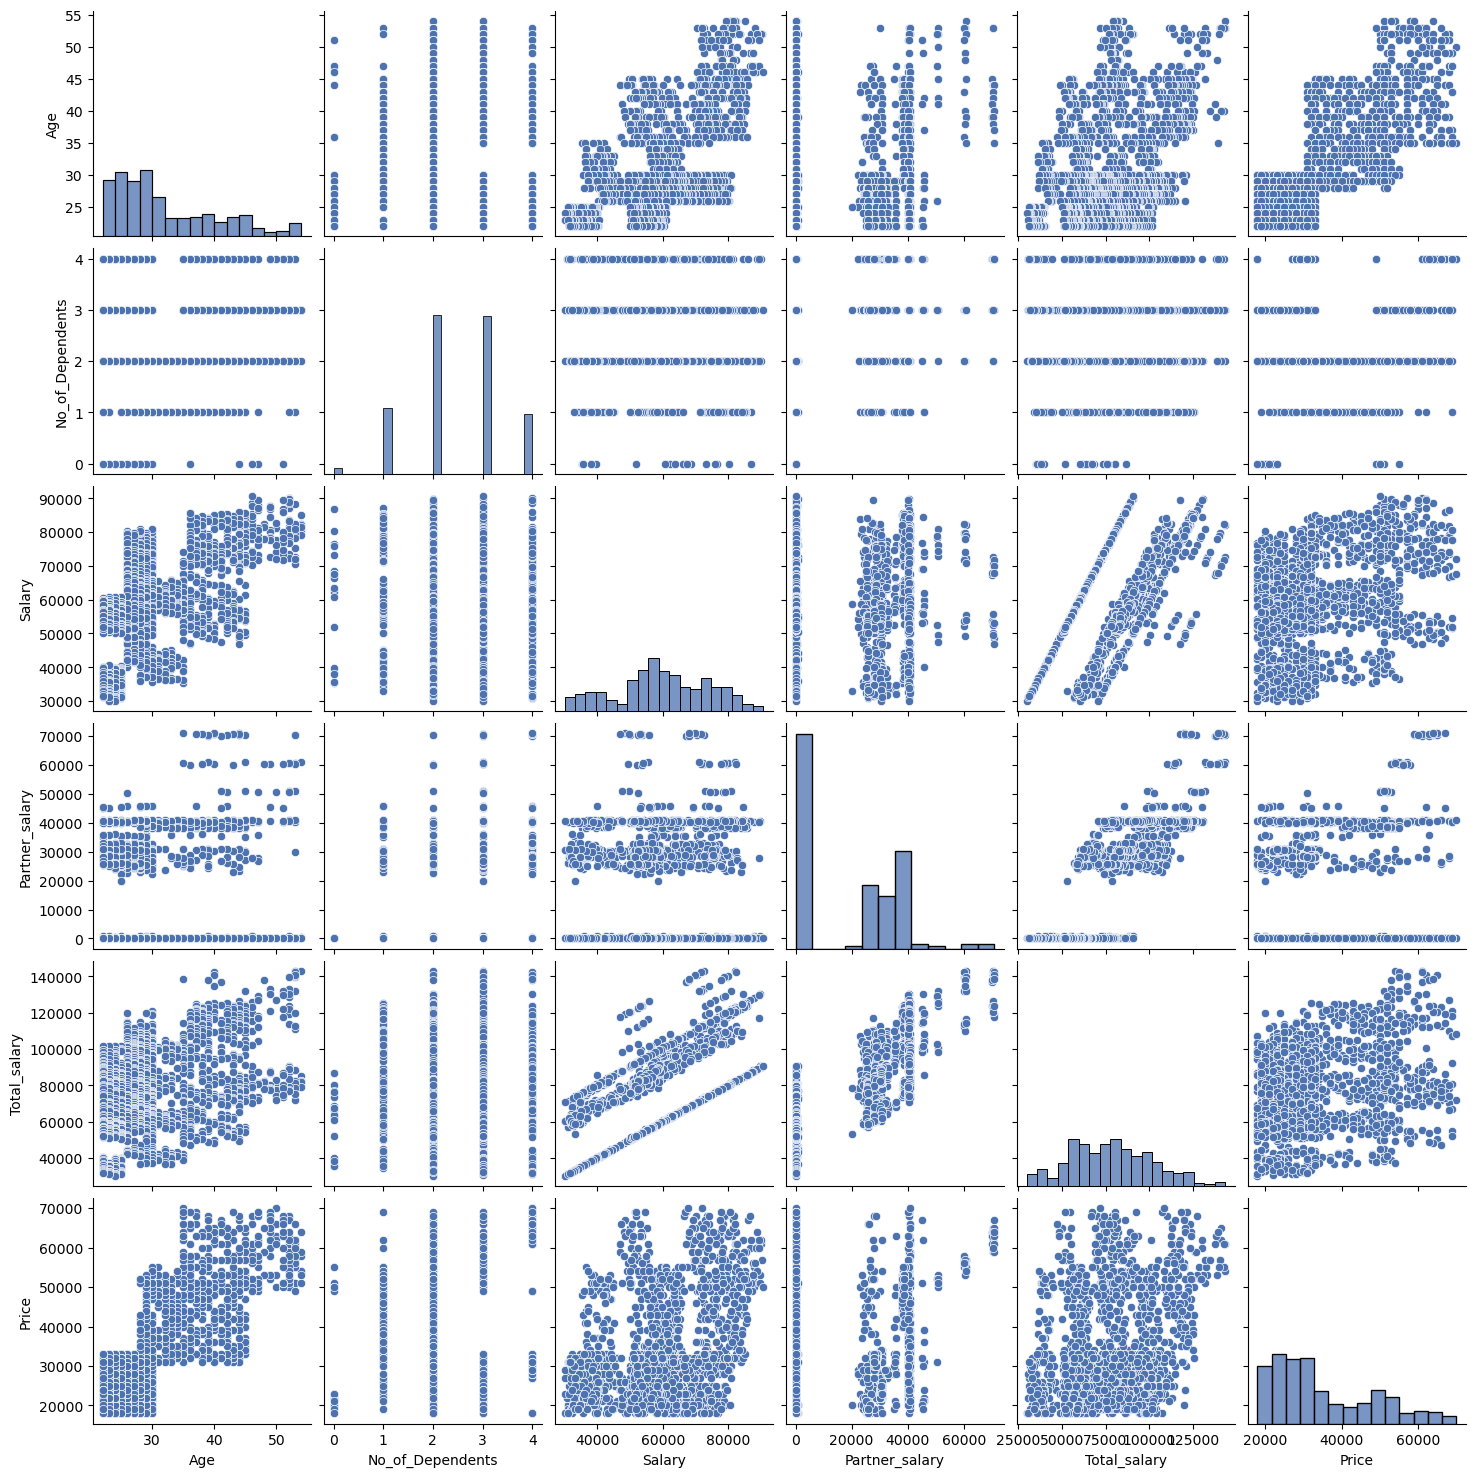

In [51]:
#Correlation Without Total Salary outliers
sns.pairplot(austo_out_treat)
plt.show()

* Hightest positive correlation between Price(with outliers) and Age and Total_salary and Partner_salary(without outliers).

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

#### E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

#### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

#### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [52]:
# E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”.

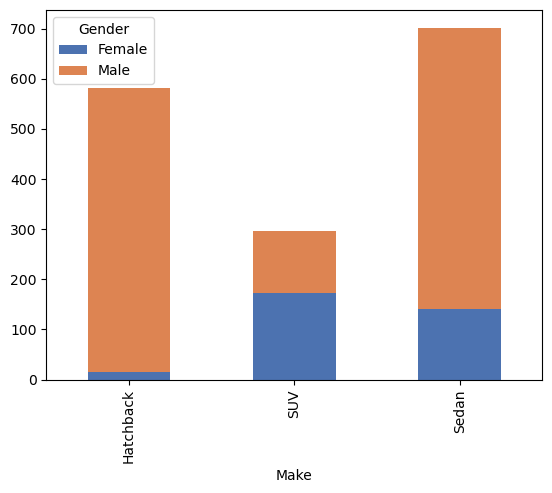

In [53]:
#Bivariate Analysis between Gender and Make
# Group the 'Gender' and 'Make' according to the number of car purchases and reset it index after that....
#...we pivot or reshape the columns of 'Gender'' and index value of 'Make' 

austo_plot = austo.groupby(['Gender', 'Make']).size().reset_index().pivot(columns='Gender', index='Make', values=0)

austo_plot.plot(kind='bar', stacked=True);

*  No, Women prefer SUV by a large margin, compared to Men.
* SUV make are the preferred cars by Females, followed by sedan and then hatchback.

In [54]:
# E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

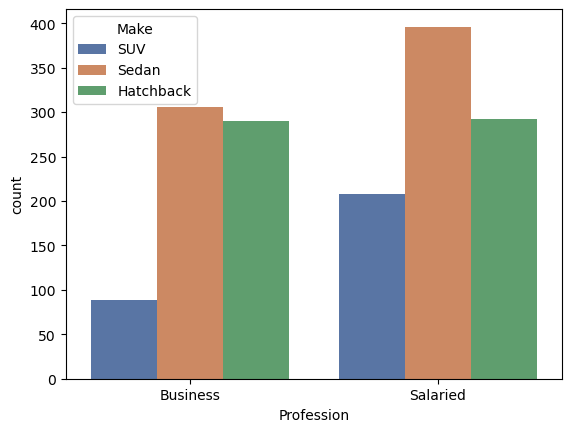

In [55]:
#Bivariate Analysis between Profession and Make
sns.countplot(data=austo,x='Profession',hue='Make');

* Yes salaried person is more likely to buy a Sedan

In [56]:
# E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

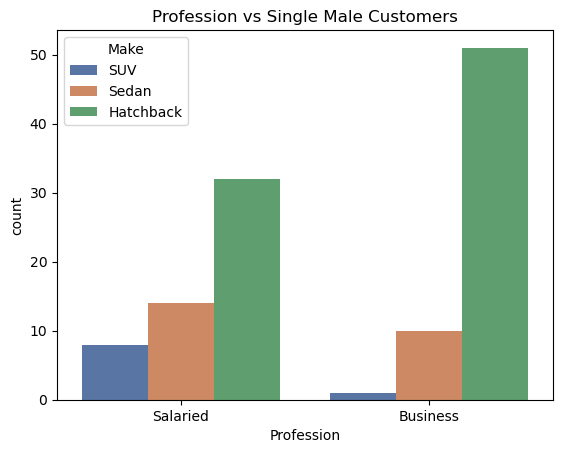

In [57]:
# Filter the dataset for single male customers
single_male_customers = austo[(austo['Gender'] == 'Male') & (austo['Marital_status'] == 'Single')]

# Create the countplot
sns.countplot(x='Profession', hue='Make', data=single_male_customers)
plt.title('Profession vs Single Male Customers')
plt.show()

 * No, Salaried male is an easier target for a Sedan sale over a SUV sale.

### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

#### Give justification along with presenting metrics/charts used for arriving at the conclusions.

#### F1) Gender

#### F2) Personal_loan

In [58]:
# Calculate the total amounts spent by male and female customers
amount_spent = austo.groupby('Gender')['Price'].sum().reset_index()
amount_spent

,Gender,Price
0,Female,15695000
1,Male,40585000


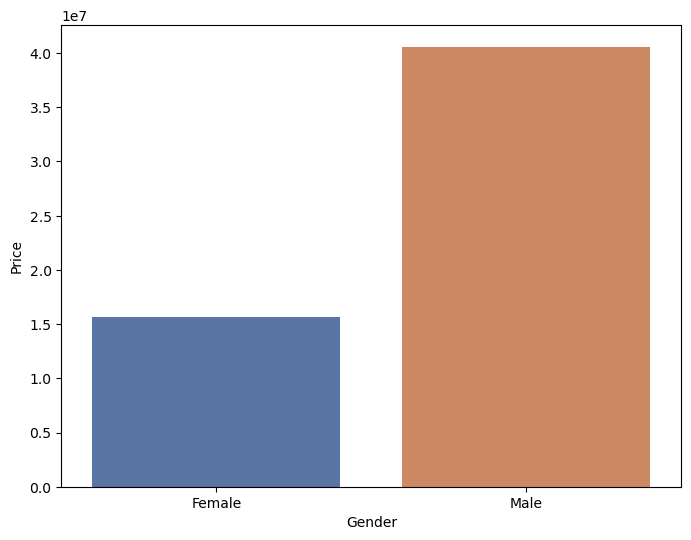

In [59]:
# Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=amount_spent,x='Gender',y='Price',ci=False)

plt.xlabel('Gender')
plt.ylabel('Price')
plt.show()

* Male spent more amounts in purchasing car than Female.

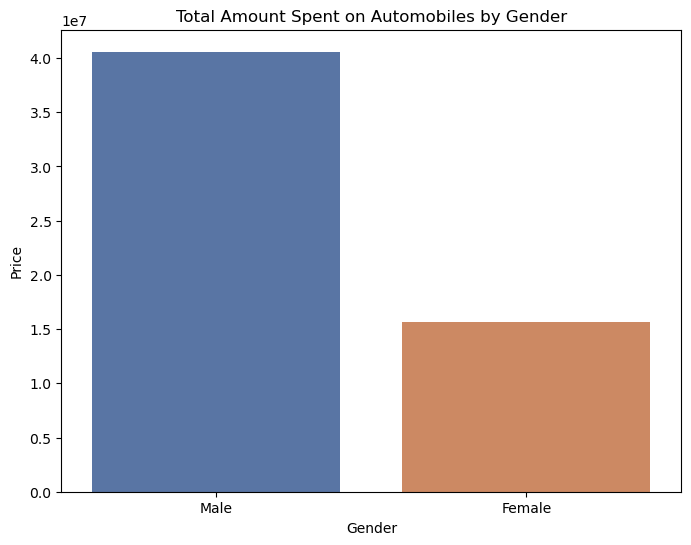

In [60]:
# Calculate the total amounts spent by male and female customers
male_total_spent = austo[austo['Gender'] == 'Male']['Price'].sum()
female_total_spent = austo[austo['Gender'] == 'Female']['Price'].sum()

# Create a bar plot to compare the amounts spent by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[male_total_spent, female_total_spent])
plt.title('Total Amount Spent on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.show()

* However, when we break down spending by gender, women spend more than men do. Both those with and without personal loans spend almost the same amount on automobile purchases.

In [61]:
Personal_austo=austo.groupby('Personal_loan')['Price'].sum().reset_index()
Personal_austo

,Personal_loan,Price
0,No,28990000
1,Yes,27290000


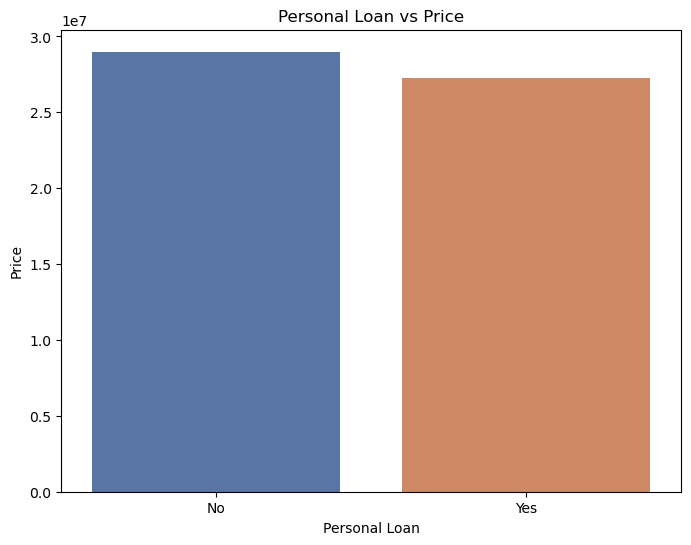

In [62]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=Personal_austo,x='Personal_loan',y='Price',ci=False)
plt.title('Personal Loan vs Price')
plt.xlabel('Personal Loan')
plt.ylabel('Price')
plt.show()

* Both those with and without personal loans spend almost the same amount on automotive purchases.

### G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [63]:
# Calculate the mean price of cars for customers with and without a working partner
average_price_with_partner = austo[austo['Partner_working'] == 'Yes']['Price'].mean()
average_price_without_partner = austo[austo['Partner_working'] == 'No']['Price'].mean()

print("Average price of cars for customers with a working partner: ", average_price_with_partner)
print("Average price of cars for customers without a working partner: ", average_price_without_partner)

# Compare the mean prices and provide a comment
if average_price_with_partner > average_price_without_partner:
    print("Based on the current dataset, having a working partner is associated with the purchase of a higher-priced car.")
else:
    print("Based on the current dataset, having a working partner is not necessarily associated with the purchase of a higher-priced car.")


Average price of cars for customers with a working partner:  35267.28110599078
Average price of cars for customers without a working partner:  36000.0
Based on the current dataset, having a working partner is not necessarily associated with the purchase of a higher-priced car.


### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [64]:
# Group the 'Gender" and "Marital Status" and find the preferred car.
austo_car_prff = austo.groupby(['Gender', 'Marital_status'])['Make'].apply(lambda x: x.mode()[0]).reset_index()
austo_car_prff

,Gender,Marital_status,Make
0,Female,Married,SUV
1,Female,Single,Sedan
2,Male,Married,Sedan
3,Male,Single,Hatchback


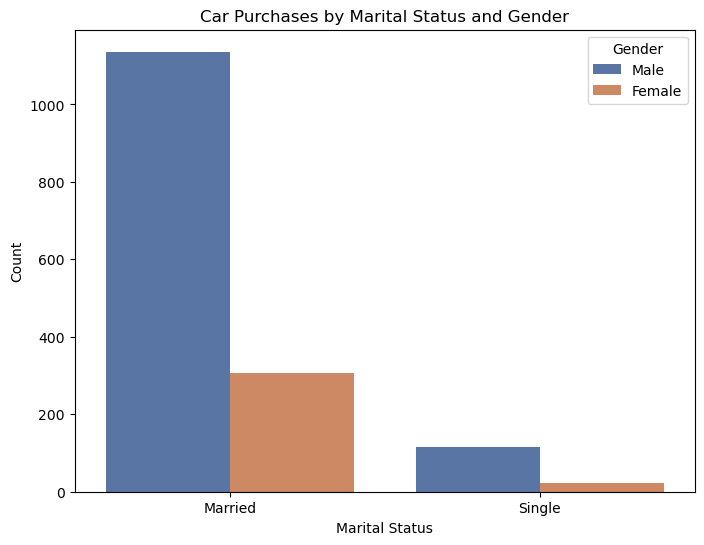

In [65]:
# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_status', hue='Gender', data=austo)
plt.title('Car Purchases by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#### Based on the past numbers that have occurred the most frequently, we may divide the data into four groups and give each group a different automobile make.

1. Married Male Preferred Sedan
2. Married Female Preferred SUV
3. Single Female Preferred Sedan
4. Single Male Preferred Hatchback

**END OF PROBLEM 1**

**Problem 2**

A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [66]:
GODIGT=pd.read_excel('godigt_cc_data .xlsx')

In [67]:
GODIGT.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [68]:
GODIGT.shape

(8448, 28)

In [69]:
GODIGT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [70]:
GODIGT.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [71]:
# Check for duplicate column values
duplicates = GODIGT.duplicated(keep=False)

# Check if any columns have duplicate values
if duplicates.any():
    # Get the columns with duplicate values
    duplicate_columns =  GODIGT.columns[duplicates].tolist()
    print("Duplicate columns:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


**In a given data set, there are 8448 rows and 28 columns. Transactor_revolver has null values, but there are no duplicate values in the whole dataframe.**

### `Framing An Analytics Problem` Analyse the dataset and list down the top 5 important variables, along with the business justifications.

In [72]:
GODIGT.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


#### Univariate Analysis

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


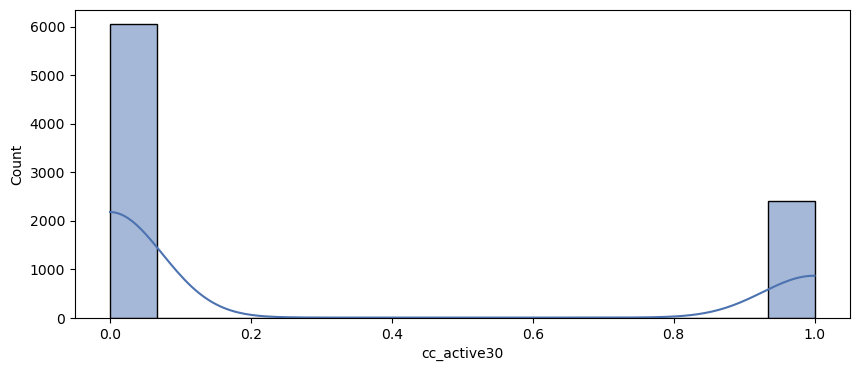

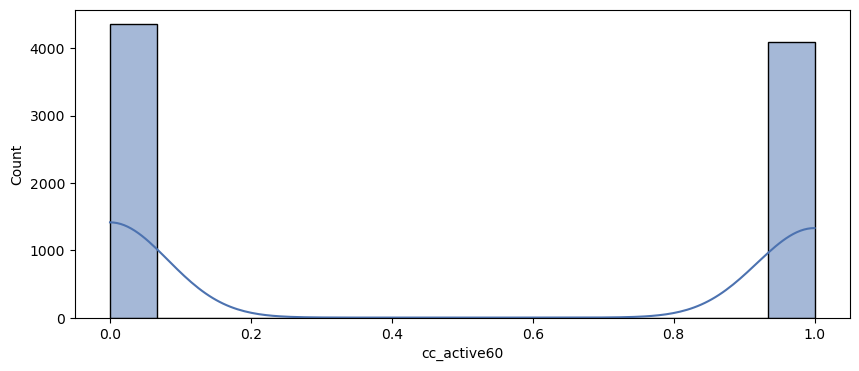

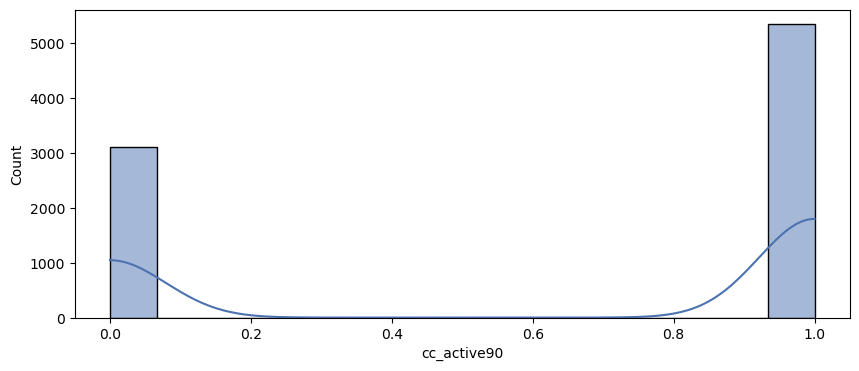

In [73]:
plt.figure(figsize=(10, 4))
print(sns.histplot(data=GODIGT,x='cc_active30',kde=True));

plt.figure(figsize=(10, 4))
print(sns.histplot(data=GODIGT,x='cc_active60',kde=True));

plt.figure(figsize=(10, 4))
print(sns.histplot(data=GODIGT,x='cc_active90',kde=True));

#### In the last 90–60 months, credit card activity scores increased as the number of customers increased, but in the last 30 months, credit card activity scores decreased as the number of customers increased. To understand why this happened, we have to analyze it separately.

##### Top 5 important variables
1. annual_income_at_source 
2. avg_spends_l3m 
3. cc_limit 
4. T+1_month_activity 
5. cc_active30 

* The bank may create strategies to keep consumers, promote credit card use, and increase profitability by concentrating on these factors. 


* This might involve better client engagement programs, customised offers, targeted marketing efforts, and changes to credit limits.

**END OF PROBLEM 2**